In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Let the data confess/cancer_reg (1) (1).csv', encoding='ISO-8859-1')

In [ ]:
data.head(10)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
5,428.0,152,176.0,505.4,52313,61023,15.6,180.259902,"(51046.4, 54545.6]",45.4,43.5,48.0,"Mason County, Washington",2.58,50.4,29.9,35.1,NaN,4.5,30.4,11.9,44.1,12.9,60.0,38.8,32.6,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476
6,250.0,97,175.9,461.8,37782,41516,23.2,0.000000,"(37413.8, 40362.7]",42.6,42.2,43.5,"Okanogan County, Washington",2.42,54.1,26.1,41.4,NaN,5.8,29.8,11.9,51.8,8.9,49.5,35.0,28.3,46.4,28.7,75.106455,0.616955,0.866157,8.356721,51.013900,4.204317
7,146.0,71,183.6,404.0,40189,20848,17.8,0.000000,"(37413.8, 40362.7]",51.7,50.8,52.5,"Pacific County, Washington",2.24,52.7,27.3,33.9,36.5,2.2,31.6,11.3,40.9,8.9,55.8,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
8,88.0,36,190.5,459.4,42579,13088,22.3,0.000000,"(40362.7, 42724.4]",49.3,48.4,49.8,"Pend Oreille County, Washington",2.38,55.9,34.7,39.4,NaN,1.4,32.2,12.0,39.5,10.3,55.5,37.8,29.9,48.1,26.6,91.787477,0.185071,0.208205,0.616903,53.446998,5.587583
9,4025.0,1380,177.8,510.9,60397,843954,13.1,427.748432,"(54545.6, 61494.5]",35.8,34.7,37.0,"Pierce County, Washington",2.65,50.0,15.6,36.3,NaN,7.1,28.8,16.2,56.6,9.2,69.9,NaN,44.4,31.4,16.5,74.729668,6.710854,6.041472,2.699184,50.063573,5.533430


**Checking for null values**

In [ ]:
data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

**Removing this column because it has 2200+ nan values which is more than 50% of the data**

In [ ]:
data=data.drop('PctSomeCol18_24',axis=1)

In [ ]:
object=[]
for i in data.columns:
  if data[i].dtypes=='object':
    object.append(i)

In [ ]:
data=data.drop(object,axis=1)


**Replacing the NAN of numerical data with the mean of the respected column**

In [ ]:
data['PctEmployed16_Over'].fillna((data['PctEmployed16_Over'].mean()), inplace=True)
data['PctPrivateCoverageAlone'].fillna((data['PctPrivateCoverageAlone'].mean()), inplace=True)


# Checking for Outliers

In [ ]:
data["TARGET_deathRate"].describe()

count    3047.000000
mean      178.664063
std        27.751511
min        59.700000
25%       161.200000
50%       178.100000
75%       195.200000
max       362.800000
Name: TARGET_deathRate, dtype: float64

In [ ]:
Q1 = 161.200000
Q2 = 178.10
Q3 = 195.2
IQR = Q3 - Q1
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)

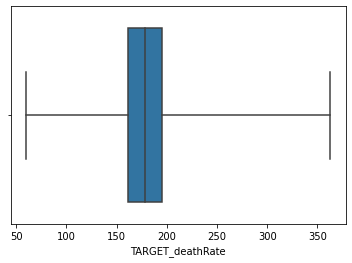

In [ ]:
sns.boxplot(x = 'TARGET_deathRate' , data = data , whis = upper_limit - Q3)

In [ ]:
sum(data["TARGET_deathRate"] > upper_limit)

43

## Removing 43 outliers

In [ ]:
df=data[data["TARGET_deathRate"] < upper_limit].iloc[:,:]

In [ ]:
y=df['TARGET_deathRate']
df=df.drop('TARGET_deathRate',axis=1)

In [ ]:
DATA=df

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, Features, Label, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square



#Running some alogs without  Scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.35,random_state=45)


In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

test_pred = LR.predict(X_test)
train_pred = LR.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 13.968148227169005
MSE: 348.95013219030477
RMSE: 18.680206963262073
R2 Square 0.5021502000763556
Train set evaluation:
_____________________________________
MAE: 13.702359606583322
MSE: 326.7235180844816
RMSE: 18.07549496098189
R2 Square 0.49797394055752864


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
test_pred = RF.predict(X_test)
train_pred = RF.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 13.591009505703424
MSE: 328.1402065342206
RMSE: 18.114640668095536
R2 Square 0.5318398788258032
Train set evaluation:
_____________________________________
MAE: 4.882086577868849
MSE: 42.9435474523565
RMSE: 6.553132644190601
R2 Square 0.9340152186399608


##Hyper parameters tuning

In [ ]:
from sklearn.model_selection import KFold,GridSearchCV
n_folds=5
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator=RF, param_grid=param_grid, n_jobs=-1, cv=n_folds)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [ ]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 30}

In [ ]:
grid_rf=RandomForestRegressor(bootstrap= True,
 max_features='auto',
 min_samples_split= 8,
 n_estimators= 30)

In [ ]:
grid_rf.fit(X_train,y_train)
test_pred = grid_rf.predict(X_test)
train_pred = grid_rf.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

RandomForestRegressor(min_samples_split=8, n_estimators=30)

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [ ]:
test_pred = svr.predict(X_test)
train_pred = svr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 20.35639223047238
MSE: 673.7660737282051
RMSE: 25.957004328855152
R2 Square 0.03873283298258601
Train set evaluation:
_____________________________________
MAE: 19.429996367383232
MSE: 614.5620917247347
RMSE: 24.790362880053504
R2 Square 0.05569642797640617


In [ ]:
from sklearn.svm import LinearSVR
linear=LinearSVR()
linear.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR()

In [ ]:
test_pred = linear.predict(X_test)
train_pred = linear.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 34.02730817890748
MSE: 3890.334134862485
RMSE: 62.37254311684337
R2 Square -4.550369213275296
Train set evaluation:
_____________________________________
MAE: 34.130769119478714
MSE: 6768.937732080702
RMSE: 82.27355426916174
R2 Square -9.40079133626756


In [ ]:
from xgboost import XGBRegressor

xgb=XGBRegressor(random_state=5)
xgb.fit(X_train,y_train)
test_pred = xgb.predict(X_test)
train_pred = xgb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[11:59:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 12.594299632605491
MSE: 284.4116479795711
RMSE: 16.864508530626416
R2 Square 0.5942277449393167
Train set evaluation:
_____________________________________
MAE: 9.88351822133924
MSE: 162.52306616424457
RMSE: 12.748453481275467
R2 Square 0.7502756613503205


# Scaling Data

### We need to scale the data because if we dont scale it then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scale=sc.fit_transform(df)
X_scale=pd.DataFrame(X_scale,columns=df.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.35,random_state=45)


In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
test_pred = LR.predict(X_test)
train_pred = LR.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 13.968148227169
MSE: 348.9501321903042
RMSE: 18.680206963262055
R2 Square 0.5021502000763565
Train set evaluation:
_____________________________________
MAE: 13.7023596065833
MSE: 326.7235180844816
RMSE: 18.07549496098189
R2 Square 0.49797394055752864


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
test_pred = RF.predict(X_test)
train_pred = RF.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 13.537054182509506
MSE: 326.98564563973383
RMSE: 18.082744416701072
R2 Square 0.5334870996097931
Train set evaluation:
_____________________________________
MAE: 4.931494877049174
MSE: 43.433007594262236
RMSE: 6.590372341094412
R2 Square 0.9332631401004798


##Hyper parameters tunining

In [ ]:
from sklearn.model_selection import KFold,GridSearchCV
n_folds=5
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator=RF, param_grid=param_grid, n_jobs=-1, cv=n_folds)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [ ]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 30}

In [ ]:
grid_rf=RandomForestRegressor(bootstrap= True,
 max_features='auto',
 min_samples_split= 2,
 n_estimators= 30)

In [ ]:
grid_rf.fit(X_train,y_train)
test_pred = grid_rf.predict(X_test)
train_pred = grid_rf.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 13.665430925221798
MSE: 338.933425095057
RMSE: 18.410144624501378
R2 Square 0.5164411120526927
Train set evaluation:
_____________________________________
MAE: 5.075420081967215
MSE: 47.6980383310565
RMSE: 6.9063766427162445
R2 Square 0.9267097196832811


In [ ]:
from xgboost import XGBRegressor

xgb=XGBRegressor(random_state=5)
xgb.fit(X_train,y_train)
test_pred = xgb.predict(X_test)
train_pred = xgb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[12:12:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 12.597334446199945
MSE: 284.9413029048574
RMSE: 16.880204468692238
R2 Square 0.5934720822406749
Train set evaluation:
_____________________________________
MAE: 9.88351822133924
MSE: 162.52306616424457
RMSE: 12.748453481275467
R2 Square 0.7502756613503205


# RFE

Why RFE(Recursive Feature Elimination) is used


> Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.35,random_state=45)


In [ ]:
from sklearn.feature_selection import RFE
rfe=RFE(xgb)
rfe=rfe.fit(X_train,y_train)
imp_features = pd.DataFrame(list(zip(df.columns, rfe.support_, rfe.ranking_)), columns=['Feature','Support','Ranking'])

[12:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

**The below code removes the weak columns.**

In [ ]:
name = df.columns[rfe.support_]
RFE_DATA=df[name]

Using the RFE created data 

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(RFE_DATA,y,test_size=0.35,random_state=45)
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
test_pred = LR.predict(X_test)
train_pred = LR.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 14.321778392625749
MSE: 355.8634736510954
RMSE: 18.8643439761656
R2 Square 0.49228688338564464
Train set evaluation:
_____________________________________
MAE: 14.118330928673869
MSE: 343.3974853977707
RMSE: 18.530987167384545
R2 Square 0.4723536051906737


In [ ]:
from xgboost import XGBRegressor

xgb=XGBRegressor(random_state=5)
xgb.fit(X_train,y_train)
test_pred = xgb.predict(X_test)
train_pred = xgb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[12:16:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 12.669216905891215
MSE: 283.33850414288264
RMSE: 16.832661825833807
R2 Square 0.5957588073895046
Train set evaluation:
_____________________________________
MAE: 9.990936441108829
MSE: 168.5648110104904
RMSE: 12.983251172587334
R2 Square 0.7409922361010449


# VIF

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone

Multicollinearity creates a problem in the multiple regression because the inputs are all influencing each other. Therefore, they are not actually independent, and it is difficult to test how much the combination of the independent variables affects the dependent variable, or outcome, within the regression model 

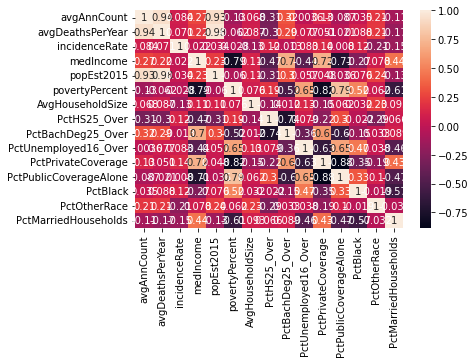

In [ ]:
sns.heatmap(RFE_DATA.corr(),annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature name']=RFE_DATA.columns
vif['VIF']=[variance_inflation_factor(RFE_DATA.values, i) 
               for i in range(RFE_DATA.shape[1])]

In [ ]:
remove=[]
for i in range(len(vif)):
  if vif['VIF'][i]>75:
    remove.append(vif['Feature name'][i]) 

In [ ]:
vif_data=RFE_DATA.drop(remove,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(vif_data,y,test_size=0.35,random_state=45)


In [ ]:
from xgboost import XGBRegressor

xgb=XGBRegressor(random_state=5)
xgb.fit(X_train,y_train)
test_pred = xgb.predict(X_test)
train_pred = xgb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[12:23:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 14.163184390049924
MSE: 356.8021277396329
RMSE: 18.889206646644347
R2 Square 0.4909476984790716
Train set evaluation:
_____________________________________
MAE: 11.18848838063537
MSE: 208.61108848974143
RMSE: 14.443375245756839
R2 Square 0.6794592463851048


In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
test_pred = LR.predict(X_test)
train_pred = LR.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 16.140432803406917
MSE: 460.11170148934673
RMSE: 21.4502144858588
R2 Square 0.3435551461431334
Train set evaluation:
_____________________________________
MAE: 15.639710316453211
MSE: 420.1227747445103
RMSE: 20.496896710100053
R2 Square 0.3544615878172339


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
test_pred = RF.predict(X_test)
train_pred = RF.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 14.371943916349814
MSE: 366.9859209134981
RMSE: 19.156876595977177
R2 Square 0.47641840352724285
Train set evaluation:
_____________________________________
MAE: 5.159526127049174
MSE: 47.8289850025614
RMSE: 6.915850273289713
R2 Square 0.926508513960846


CONCLUSION

--> The Highest Accuracy which i got was **60%** from XGBoost Regressor on RFE data. 